In [105]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
# Add interactive control to plot
%matplotlib widget
#%matplotlib inline
import numpy as np
from astropy.io import fits

In [97]:
file = fits.open('r.fits')
file

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7d6863b9b3a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7d6863cd5d20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7d6863cd5f90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7d6863cd6050>]

In [98]:
file.info()

Filename: r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [99]:
#read data from Primary HDU
data = file[0].data

In [100]:
data

array([[-0.02612305, -0.00144768,  0.02322388, ..., -0.02090454,
         0.00368881, -0.00122833],
       [ 0.00348282,  0.03308105, -0.01623535, ..., -0.01599121,
        -0.07006836, -0.02087402],
       [ 0.00348663, -0.00144768, -0.01623535, ...,  0.00860596,
         0.06762695, -0.00122833],
       ...,
       [ 0.0144043 , -0.03985596,  0.04400635, ..., -0.0592041 ,
        -0.00018239,  0.03912354],
       [ 0.00947571,  0.0144043 , -0.00039244, ..., -0.04443359,
        -0.00509644, -0.02966309],
       [-0.00039148,  0.04400635,  0.02426147, ...,  0.02932739,
         0.00473785, -0.02474976]], dtype='>f4')

In [101]:
np.shape(data)

(1489, 2048)

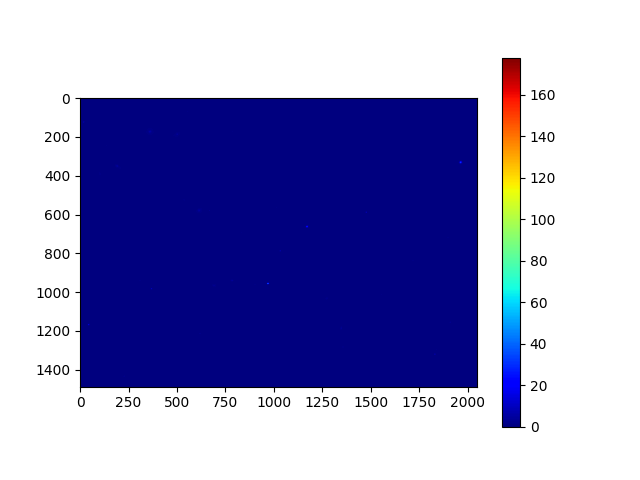

In [106]:
plt.imshow(data, cmap='jet') # plot the 2D image with imshow on linear scale, ccd are linear
plt.colorbar()
plt.show()

#Our eyes are logrithmic in terms of intensity

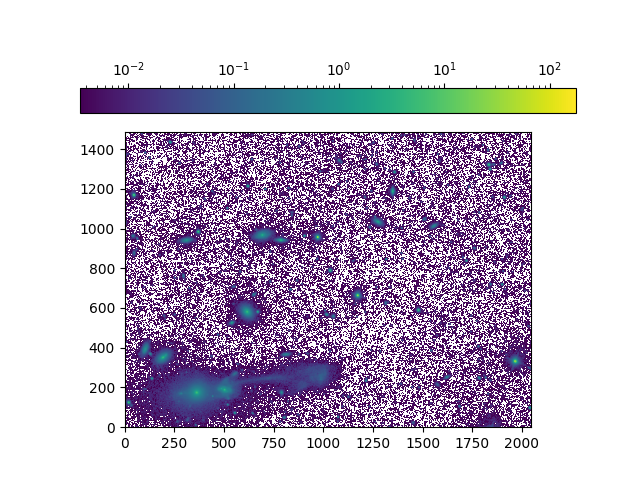

In [112]:
# So plot this on log scale, now you can the real image as seen by your eyes, our eyes are not linear like CCD

plt.figure()
plt.imshow(data, cmap='viridis', norm=LogNorm(), origin='lower') # origin makes both axis pixels increasing from 0 to onwards
plt.colorbar(location='top')

#These images contains header about  

In [114]:
# Print header information @ NAXIS1 = row, header gives all information about object RA, DEC and observation conditions etc
file[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4609823091.17 / 1st row - Number of seconds since Nov 17 1858  
RA      =            167.20433 / 1st row - Right ascension of telescope boresigh
DEC     =            28.798722 / 1st row - Declination of telescope boresight (d
SPA     =              81.210  / 1st row - Camera col position angle wrt north (
IPA     =             154.95